In [27]:
# Environment Setup: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

# For advanced text visualization (if needed)
from wordcloud import WordCloud

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set Seaborn style for visuals
sns.set(style="whitegrid")

In [10]:
df_raw = pd.read_csv('Covid_Data.csv', encoding='utf-8')

In [11]:
print("Raw Data Snapshot:")
display(df_raw.head())

Raw Data Snapshot:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [12]:
print("Dataset Information:")
display(df_raw.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575

None

In [13]:
print("Missing Values in Raw Data:")
display(df_raw.isnull().sum())

Missing Values in Raw Data:


,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [14]:
# %% [code]
# Create a copy for cleaning
df = df_raw.copy()

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Convert DATE_DIED to datetime format (if the field is not empty)
# Some entries might be empty or NaN for patients who did not die
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format='%Y-%m-%d', errors='coerce')

# Convert numerical columns to proper numeric types
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Convert binary indicator columns (if not already numeric) to integers:
binary_cols = ['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD',
               'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
               'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']

for col in binary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Optionally, fill missing values for binary fields with 0 (or an appropriate value)
df[binary_cols] = df[binary_cols].fillna(0)

# Handle missing values in categorical columns (e.g., SEX, PATIENT_TYPE, MEDICAL_UNIT, CLASIFFICATION_FINAL)
categorical_cols = ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

print("Data cleaning completed!")

Data cleaning completed!


In [15]:
print("Cleaned Data Snapshot:")
display(df.head())

print("Cleaned Dataset Information:")
display(df.info())

print("Missing Values in Cleaned Data:")
display(df.isnull().sum())

Cleaned Data Snapshot:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,NaT,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,NaT,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,NaT,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,NaT,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,NaT,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   USMER                 236526 non-null  int64         
 1   MEDICAL_UNIT          236526 non-null  int64         
 2   SEX                   236526 non-null  int64         
 3   PATIENT_TYPE          236526 non-null  int64         
 4   DATE_DIED             0 non-null       datetime64[ns]
 5   INTUBED               236526 non-null  int64         
 6   PNEUMONIA             236526 non-null  int64         
 7   AGE                   236526 non-null  int64         
 8   PREGNANT              236526 non-null  int64         
 9   DIABETES              236526 non-null  int64         
 10  COPD                  236526 non-null  int64         
 11  ASTHMA                236526 non-null  int64         
 12  INMSUPR               236526 non-

None

Missing Values in Cleaned Data:


,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,236526
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [16]:
# Descriptive statistics for key numeric features
print("Descriptive Statistics for Key Features:")
display(df[['AGE', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
            'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']].describe())

Descriptive Statistics for Key Features:


,AGE,INTUBED,PNEUMONIA,DIABETES,COPD,ASTHMA,HIPERTENSION,OBESITY,RENAL_CHRONIC,TOBACCO
count,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000
mean,52.620274,44.238401,4.525765,2.840855,2.966976,2.949325,2.691319,2.768863,2.954956,2.973352
std,19.318869,47.394072,16.731469,10.500621,9.882551,9.839247,10.098528,9.959472,9.888310,10.289529
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,54.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,121.000000,99.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000


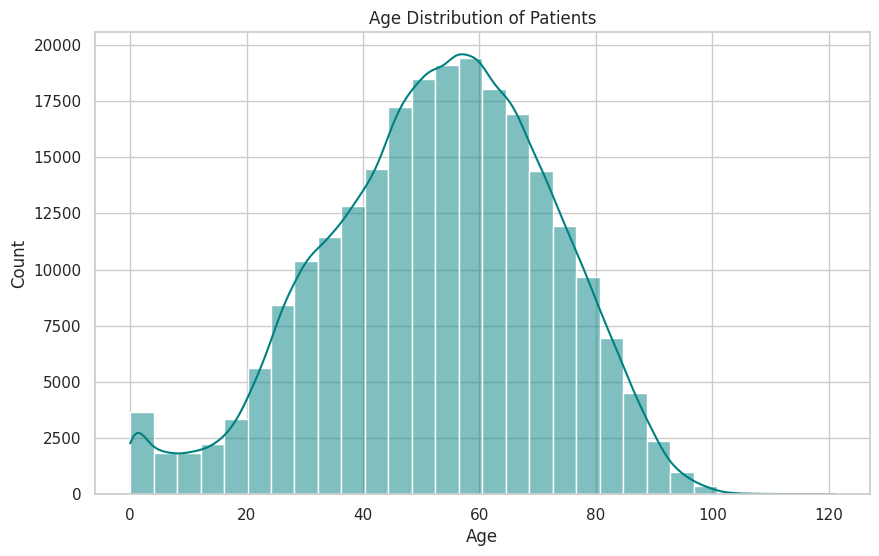

In [17]:
# Visualization: Age Distribution of Patients
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='teal')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

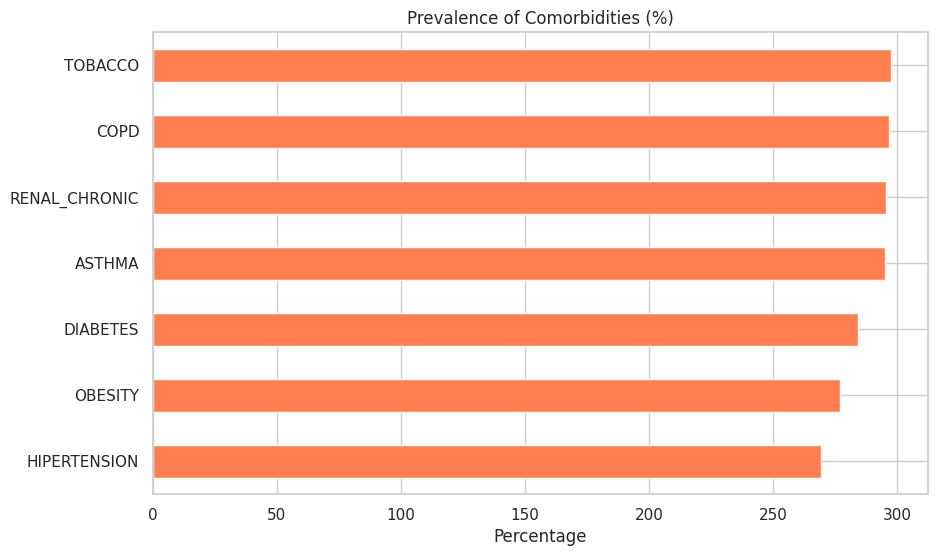

In [18]:
# Visualization: Comorbidity Prevalence
# Calculate the prevalence (mean values as proxy for proportion) for key comorbidities
comorbidity_cols = ['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
comorbidity_prevalence = df[comorbidity_cols].mean() * 100  # in percentages

plt.figure(figsize=(10, 6))
comorbidity_prevalence.sort_values().plot(kind='barh', color='coral')
plt.title('Prevalence of Comorbidities (%)')
plt.xlabel('Percentage')
plt.show()

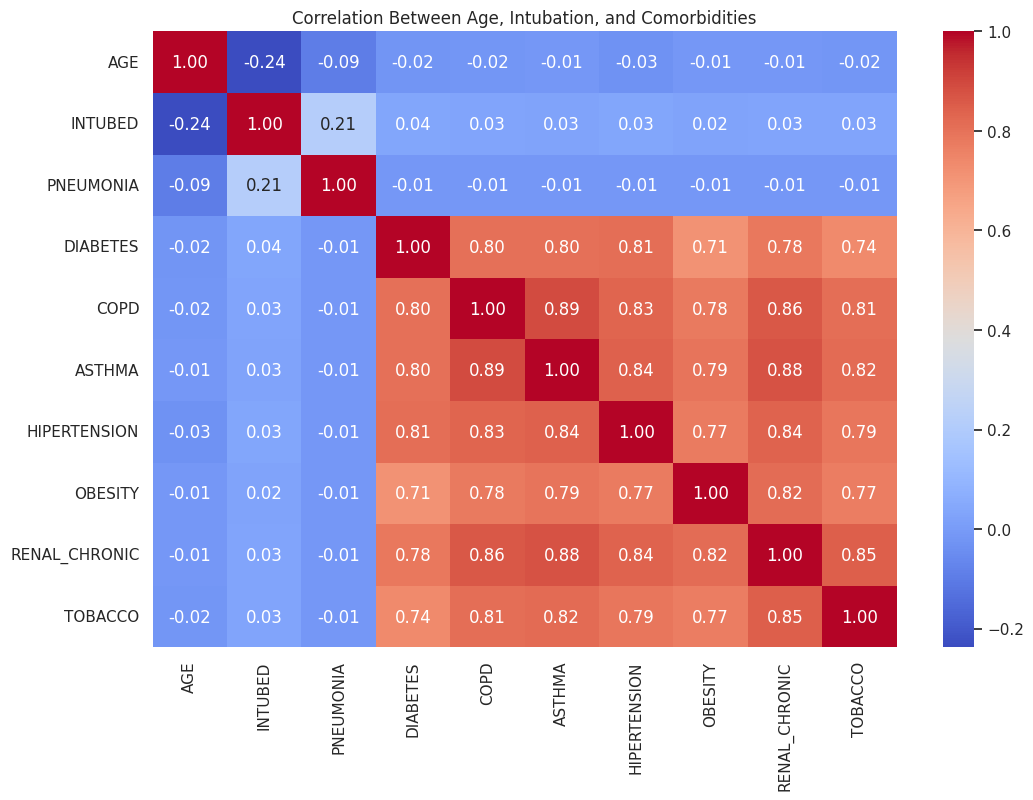

In [19]:
# Correlation Heatmap for numerical variables including comorbidities and AGE
plt.figure(figsize=(12, 8))
cols_for_corr = ['AGE', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
                 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
corr_matrix = df[cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Age, Intubation, and Comorbidities')
plt.show()

In [22]:
# Time-Series Example: Count of Deaths over Time
df_deaths = df.dropna(subset=['DATE_DIED'])
if df_deaths.empty:
    print("No death data available to plot.")
else:
    df_deaths['Month_Year'] = df_deaths['DATE_DIED'].dt.to_period('M')
    deaths_over_time = df_deaths.groupby('Month_Year').size()

    plt.figure(figsize=(12, 6))
    deaths_over_time.plot(kind='line', marker='o', color='red')
    plt.title('Number of Deaths Over Time')
    plt.xlabel('Month-Year')
# Time-Series Example: Count of Deaths over Time
df_deaths = df.dropna(subset=['DATE_DIED'])
if df_deaths.empty:
    print("No death data available to plot.")
else:
    df_deaths['Month_Year'] = df_deaths['DATE_DIED'].dt.to_period('M')
    deaths_over_time = df_deaths.groupby('Month_Year').size()

    plt.figure(figsize=(12, 6))
    deaths_over_time.plot(kind='line', marker='o', color='red')
    plt.title('Number of Deaths Over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Count of Deaths')
    plt.xticks(rotation=45)
    plt.show()

No death data available to plot.
No death data available to plot.


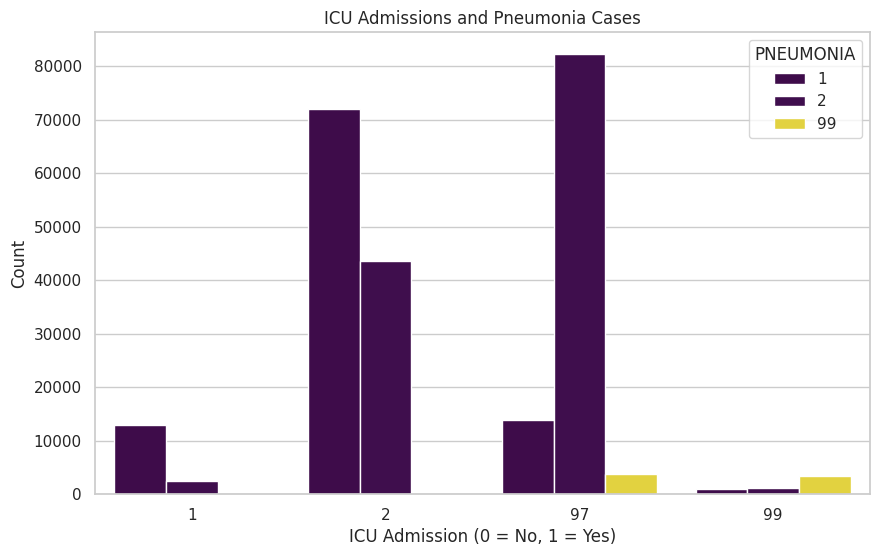

In [23]:
# Outcome Analysis: ICU Admissions vs. Other Factors
# Compare ICU admissions with the presence of pneumonia and intubation status.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ICU', hue='PNEUMONIA', palette='viridis')
plt.title('ICU Admissions and Pneumonia Cases')
plt.xlabel('ICU Admission (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='PNEUMONIA')
plt.show()

In [25]:
# Define features and target for the predictive model.
# Here we use AGE and the key comorbidity columns as features.
features = df[['AGE', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
target = df['ICU']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model.
predictions = model.predict(X_test)
# Define features and target for the predictive model.
# Here we use AGE and the key comorbidity columns as features.
features = df[['AGE', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
target = df['ICU']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model.
predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Model Accuracy: 0.5856422108853124

Classification Report:
              precision    recall  f1-score   support

           1       0.13      0.00      0.01      4655
           2       0.58      0.73      0.65     34642
          97       0.59      0.54      0.56     29912
          99       0.05      0.00      0.00      1749

    accuracy                           0.59     70958
   macro avg       0.34      0.32      0.31     70958
weighted avg       0.54      0.59      0.56     70958

